In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_csv('Data/Train_Test/X_train.csv').to_numpy()
y_train = pd.read_csv('Data/Train_Test/y_train.csv').to_numpy()
X_test = pd.read_csv('Data/Train_Test/X_test.csv').to_numpy()
y_test = pd.read_csv('Data/Train_Test/y_test.csv').to_numpy()

In [3]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train,y_train)

[03:31:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [5]:
print("Coefficient of determination R^2 <-- on train set: {}".format(xgb_reg.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.6564937452114477


In [6]:
print("Coefficient of determination R^2 <-- on test set: {}".format(xgb_reg.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.3325865485939371


In [7]:
mse = cross_val_score(xgb_reg,X_train,y_train,cv=5)
mean_mse = mse.mean()
print(mean_mse)

[03:31:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:31:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:31:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:31:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:31:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.4019146319077958


In [8]:
pred = xgb_reg.predict(X_test)

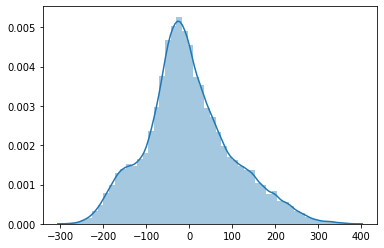

In [9]:
sns.distplot(y_test-pred)

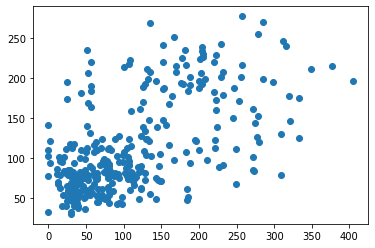

In [10]:
plt.scatter(y_test,pred)

In [11]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 49.321530591229056
MSE: 4553.203459231623
RMSE: 67.47742925772752


### Hyperparameter tunning using Random Forest 

In [13]:
xgb.XGBRegressor()

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [12]:

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']

max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

subsample=[0.7,0.6,0.8]

min_child_weight=[3,4,5,6,7]

In [13]:

random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

In [15]:
xgb_reg = xgb.XGBRegressor()
xgb_regressor = RandomizedSearchCV(xgb_reg,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=100,cv = 5,verbose=2,random_state=2,n_jobs=1)

In [16]:
xgb_regressor.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=25, learning_rate=0.3 
[03:35:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   1.2s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=25, learning_rate=0.3 
[03:35:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   0.9s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=25, learning_rate=0.3 
[03:35:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   1.0s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=25, learning_rate=0.3 
[03:35:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   0.9s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=25, learning_rate=0.3 
[03:35:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, ma

[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.8s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=30, learning_rate=0.6 
[03:36:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.9s
[CV] subsample=0.8, n_estimators=1000, min_child_weight=4, max_depth=20, learning_rate=0.1 
[03:36:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=1000, min_child_weight=4, max_depth=20, learning_rate=0.1, total=   1.6s
[CV] subsample=0.8, n_estimators=1000, min_child_weight=4, max_depth=20, learning_rate=0.1 
[03:36:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=1000, min_child_weight=4

[CV] subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=15, learning_rate=0.1 
[03:36:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=15, learning_rate=0.1, total=   0.4s
[CV] subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=15, learning_rate=0.1 
[03:36:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=15, learning_rate=0.1, total=   0.4s
[CV] subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=15, learning_rate=0.1 
[03:36:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=15, learning_rate=0.1, total=   0.4s
[CV] subsample=0.7, n_estimators=300, min_child_weight=3, max

[CV]  subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=25, learning_rate=0.1, total=   1.0s
[CV] subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=25, learning_rate=0.1 
[03:36:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=25, learning_rate=0.1, total=   1.0s
[CV] subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=25, learning_rate=0.1 
[03:36:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=25, learning_rate=0.1, total=   1.0s
[CV] subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=25, learning_rate=0.1 
[03:36:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=1000, min_child_weigh

[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.05, total=   0.0s
[CV] subsample=0.7, n_estimators=600, min_child_weight=7, max_depth=5, learning_rate=0.3 
[03:37:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=600, min_child_weight=7, max_depth=5, learning_rate=0.3, total=   0.3s
[CV] subsample=0.7, n_estimators=600, min_child_weight=7, max_depth=5, learning_rate=0.3 
[03:37:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=600, min_child_weight=7, max_depth=5, learning_rate=0.3, total=   0.3s
[CV] subsample=0.7, n_estimators=600, min_child_weight=7, max_depth=5, learning_rate=0.3 
[03:37:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=600, min_child_weight=7, max_dep

[CV]  subsample=0.6, n_estimators=400, min_child_weight=6, max_depth=25, learning_rate=0.1, total=   0.4s
[CV] subsample=0.6, n_estimators=400, min_child_weight=6, max_depth=25, learning_rate=0.1 
[03:37:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=400, min_child_weight=6, max_depth=25, learning_rate=0.1, total=   0.4s
[CV] subsample=0.6, n_estimators=400, min_child_weight=6, max_depth=25, learning_rate=0.1 
[03:37:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=400, min_child_weight=6, max_depth=25, learning_rate=0.1, total=   0.4s
[CV] subsample=0.6, n_estimators=400, min_child_weight=6, max_depth=25, learning_rate=0.1 
[03:37:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=400, min_child_weight=6, ma

[CV]  subsample=0.6, n_estimators=400, min_child_weight=7, max_depth=15, learning_rate=0.05, total=   0.4s
[CV] subsample=0.6, n_estimators=400, min_child_weight=7, max_depth=15, learning_rate=0.05 
[03:37:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=400, min_child_weight=7, max_depth=15, learning_rate=0.05, total=   0.4s
[CV] subsample=0.6, n_estimators=100, min_child_weight=5, max_depth=20, learning_rate=0.6 
[03:37:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=5, max_depth=20, learning_rate=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=5, max_depth=20, learning_rate=0.6 
[03:37:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=5,

[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=25, learning_rate=0.2, total=   1.1s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=25, learning_rate=0.2 
[03:37:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=25, learning_rate=0.2, total=   1.1s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=25, learning_rate=0.2 
[03:37:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=25, learning_rate=0.2, total=   1.1s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=25, learning_rate=0.2 
[03:37:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, ma

[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.05, total=   1.3s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.05 
[03:37:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.05, total=   1.3s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.05 
[03:38:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.05, total=   1.4s
[CV] subsample=0.7, n_estimators=600, min_child_weight=5, max_depth=20, learning_rate=0.5 
[03:38:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=600, min_child_we

[CV]  subsample=0.7, n_estimators=700, min_child_weight=4, max_depth=25, learning_rate=0.3, total=   0.7s
[CV] subsample=0.7, n_estimators=800, min_child_weight=6, max_depth=25, learning_rate=0.5 
[03:38:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=800, min_child_weight=6, max_depth=25, learning_rate=0.5, total=   0.8s
[CV] subsample=0.7, n_estimators=800, min_child_weight=6, max_depth=25, learning_rate=0.5 
[03:38:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=800, min_child_weight=6, max_depth=25, learning_rate=0.5, total=   0.7s
[CV] subsample=0.7, n_estimators=800, min_child_weight=6, max_depth=25, learning_rate=0.5 
[03:38:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=800, min_child_weight=6, ma

[CV]  subsample=0.7, n_estimators=1000, min_child_weight=7, max_depth=25, learning_rate=0.1, total=   1.1s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=7, max_depth=25, learning_rate=0.1 
[03:38:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1000, min_child_weight=7, max_depth=25, learning_rate=0.1, total=   1.2s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=7, max_depth=25, learning_rate=0.1 
[03:38:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1000, min_child_weight=7, max_depth=25, learning_rate=0.1, total=   1.2s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=7, max_depth=25, learning_rate=0.1 
[03:38:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1000, min_child_weigh

[CV]  subsample=0.6, n_estimators=700, min_child_weight=5, max_depth=15, learning_rate=0.2, total=   0.7s
[CV] subsample=0.6, n_estimators=700, min_child_weight=5, max_depth=15, learning_rate=0.2 
[03:38:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=700, min_child_weight=5, max_depth=15, learning_rate=0.2, total=   0.7s
[CV] subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=10, learning_rate=0.1 
[03:39:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=10, learning_rate=0.1, total=   0.7s
[CV] subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=10, learning_rate=0.1 
[03:39:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=800, min_child_weight=5, ma

[CV]  subsample=0.8, n_estimators=800, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.7s
[CV] subsample=0.8, n_estimators=800, min_child_weight=7, max_depth=30, learning_rate=0.6 
[03:39:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=800, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.6s
[CV] subsample=0.8, n_estimators=800, min_child_weight=7, max_depth=30, learning_rate=0.6 
[03:39:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=800, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.6s
[CV] subsample=0.8, n_estimators=800, min_child_weight=7, max_depth=30, learning_rate=0.6 
[03:39:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=800, min_child_weight=7, ma

[CV]  subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=30, learning_rate=0.2, total=   0.6s
[CV] subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=30, learning_rate=0.2 
[03:39:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=30, learning_rate=0.2, total=   0.6s
[CV] subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=30, learning_rate=0.2 
[03:39:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=30, learning_rate=0.2, total=   0.6s
[CV] subsample=0.6, n_estimators=200, min_child_weight=4, max_depth=5, learning_rate=0.05 
[03:39:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=200, min_child_weight=4, ma

[CV]  subsample=0.7, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.1, total=   1.7s
[CV] subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=25, learning_rate=0.3 
[03:39:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=25, learning_rate=0.3, total=   0.8s
[CV] subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=25, learning_rate=0.3 
[03:39:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=25, learning_rate=0.3, total=   0.7s
[CV] subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=25, learning_rate=0.3 
[03:39:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=500, min_child_weight=6, m

[CV]  subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=5, learning_rate=0.5, total=   0.1s
[CV] subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=5, learning_rate=0.5 
[03:40:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=5, learning_rate=0.5, total=   0.1s
[CV] subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=5, learning_rate=0.5 
[03:40:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=5, learning_rate=0.5, total=   0.1s
[CV] subsample=0.7, n_estimators=600, min_child_weight=3, max_depth=5, learning_rate=0.05 
[03:40:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=600, min_child_weight=3, max_dep

[CV]  subsample=0.8, n_estimators=800, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   1.0s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.1 
[03:40:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.1, total=   0.4s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.1 
[03:40:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.1, total=   0.4s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.1 
[03:40:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, m

[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.1, total=   0.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.1 
[03:40:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.1, total=   0.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.1 
[03:40:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.1, total=   0.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.1 
[03:40:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, ma

[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1, total=   1.4s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1 
[03:40:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1, total=   1.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=20, learning_rate=0.1 
[03:40:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=20, learning_rate=0.1, total=   0.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=20, learning_rate=0.1 
[03:41:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=300, min_child_weight=6,

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  5.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                            

In [17]:
xgb_regressor.best_params_

{'subsample': 0.6,
 'n_estimators': 100,
 'min_child_weight': 7,
 'max_depth': 5,
 'learning_rate': '0.05'}

In [18]:
xgb_regressor.best_score_

-4047.4992845498427

In [19]:
pred = xgb_regressor.predict(X_test)

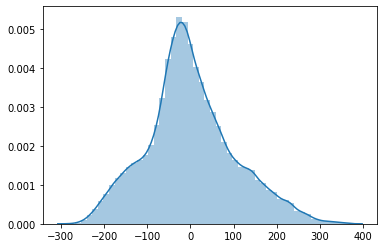

In [20]:
sns.distplot(y_test-pred)

In [21]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 47.870592373543516
MSE: 4431.41942577329
RMSE: 66.56890735000304


In [24]:
# open a file, where you ant to store the data
file = open('xgboost_regressor.pkl', 'wb')

# dump information to that file
pickle.dump(xgb_regressor, file)